In [1]:
from os import getcwd
from pandas import DataFrame, read_csv
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.pyplot import figure
from seaborn import set_theme,scatterplot,barplot,lineplot
from numpy import abs,median,mean
%matplotlib inline

In [2]:
set_theme(context="notebook",style='darkgrid', palette='inferno')

In [3]:
df = read_csv(getcwd()[:getcwd().find("individual_impacts")] + "Engineering_graduate_salary.csv")

In [4]:
df = df.filter(items=["10percentage","12percentage","Salary"])

In [5]:
df["Salary"] = df["Salary"].replace([df["Salary"][(abs(zscore(df["Salary"])) > 3)]], median(df["Salary"]))

Text(0.5, 1.0, 'Scatter Plot of 10percentage with 12percentage')

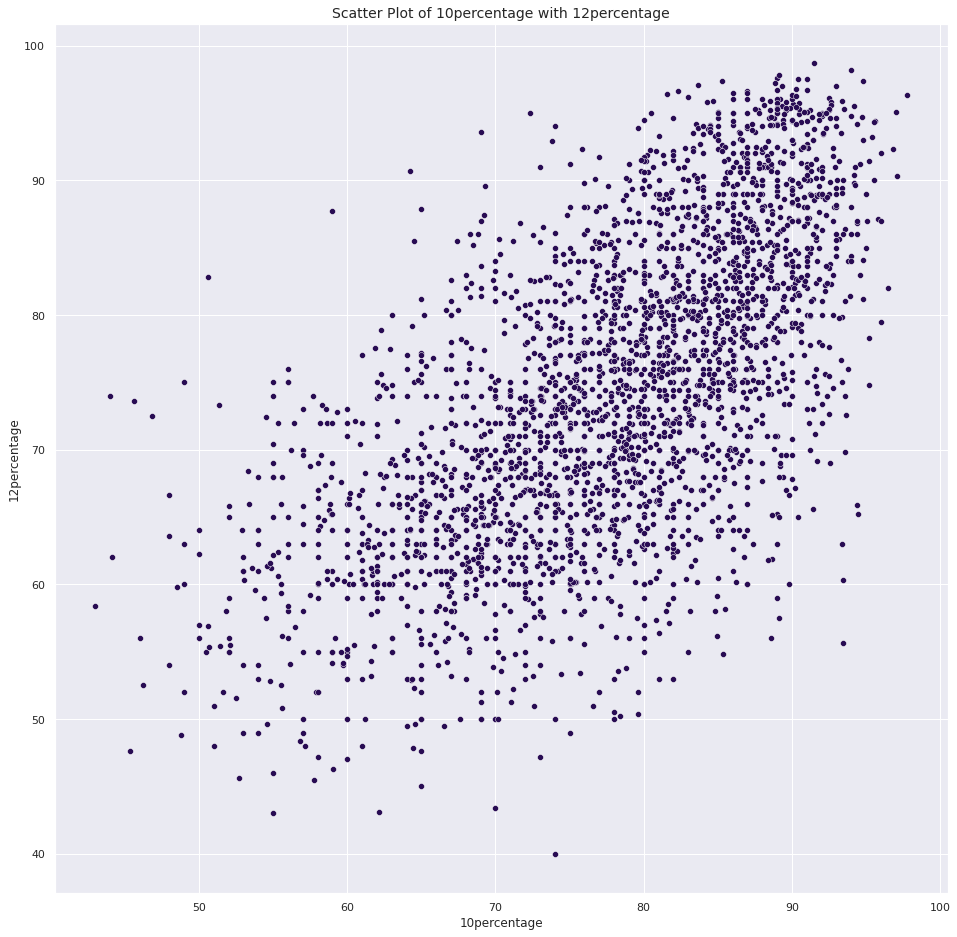

In [6]:
figure(figsize=(16,16))
plot= scatterplot(x=df["10percentage"],y=df["12percentage"])
plot.set_title("Scatter Plot of 10percentage with 12percentage", fontsize=14)

Text(0.5, 1.0, 'Scatter Plot of 10percentage with Salary')

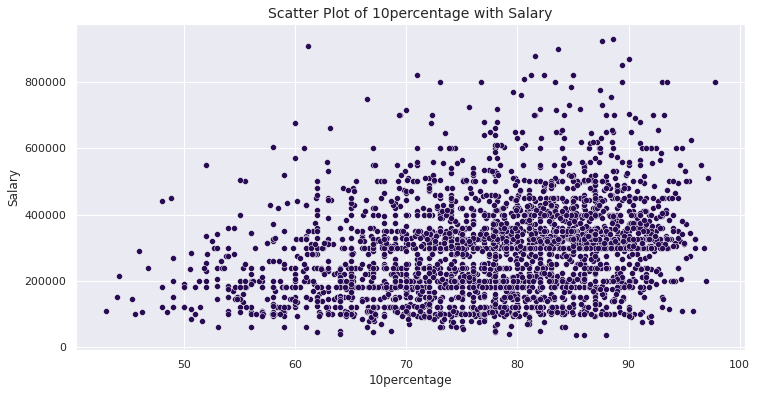

In [7]:
figure(figsize=(12,6))
plot= scatterplot(x=df["10percentage"], y=df["Salary"])
plot.set_title("Scatter Plot of 10percentage with Salary", fontsize=14)

Text(0.5, 1.0, 'Scatter Plot of 12percentage with Salary')

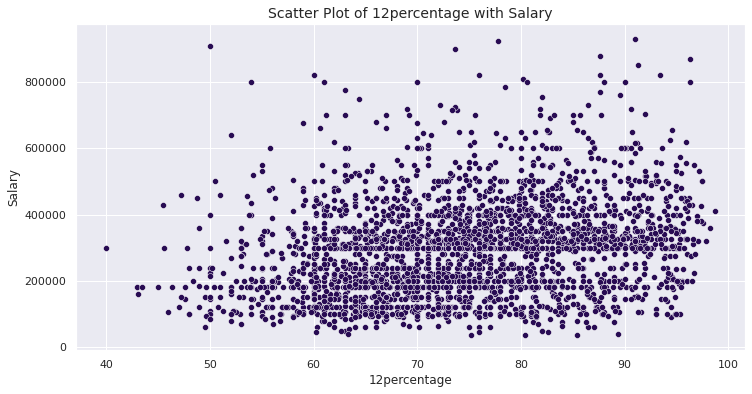

In [8]:
figure(figsize=(12,6))
plot= scatterplot(x=df["12percentage"], y=df["Salary"])
plot.set_title("Scatter Plot of 12percentage with Salary", fontsize=14)

In [9]:
df[
    (
        (
            df["10percentage"] > (df["12percentage"] - 5)
        )
        &
        (
            df["10percentage"] < (df["12percentage"] + 5)
        )
    )
]

,10percentage,12percentage,Salary
0,87.80,84.00,445000.0
3,84.30,86.00,420000.0
10,77.00,75.00,335000.0
11,81.20,79.90,300000.0
12,85.00,88.00,480000.0
...,...,...,...
2977,71.00,70.00,180000.0
2981,79.86,78.86,415000.0
2985,90.80,86.60,470000.0
2993,75.00,73.00,120000.0


Majority of students scored approx equal percentage in 12 as they did in 12

10 percentage is range of 12 percentage +-(plux/minus) 8

In [10]:
df["10percentage"].corr(df["12percentage"])

0.6455783772755835

12 percentage is highly correlated with 10 percentage

In [11]:
df["12percentage"].corr(df["Salary"])

0.26084763169693204

In [12]:
df["10percentage"].corr(df["Salary"])

0.28550214473374086

In [13]:
X = df[['10percentage', '12percentage', 'Salary']]

vif_data = DataFrame()
vif_data["Column"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Column,VIF
0,10percentage,74.621785
1,12percentage,73.357511
2,Salary,5.899743


There is high multicollinearity between 10 percentage and 12 percentage

In [14]:
df.drop(columns=["10percentage"], inplace=True)

In [15]:
percent_range_dic = {}
ranges = {}
    
for i in range(40,96,5):
    ranges[str(i)+"_to_"+str(i+5)] = 0

for percent in df["12percentage"]:
    for i in range(40,96,5):
        if (percent > i and percent <= i+5):
            ranges[str(i)+"_to_"+str(i+5)] = ranges[str(i)+"_to_"+str(i+5)] + 1

percent_range_frame = DataFrame({
    "Ranges": ranges.keys(),
    "Number of Students": ranges.values()
})
percent_range_frame

,Ranges,Number of Students
0,40_to_45,4
1,45_to_50,35
2,50_to_55,81
3,55_to_60,169
4,60_to_65,393
5,65_to_70,464
6,70_to_75,467
7,75_to_80,423
8,80_to_85,384
9,85_to_90,299


Text(0.5, 1.0, 'Bar Plot of 12percentage with number of students')

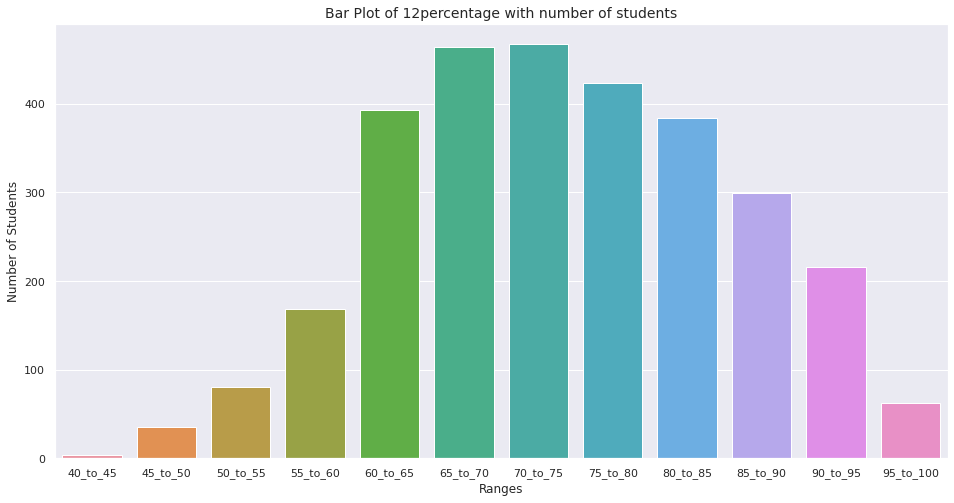

In [16]:
figure(figsize=(16,8))
plot = barplot(x=percent_range_frame["Ranges"], y=percent_range_frame["Number of Students"])
plot.set_title("Bar Plot of 12percentage with number of students", fontsize=14)

Majority of students scored averagely between 60 to 85 in 12 boards

In [17]:
ranges = [40,45,50,55,60,65,70,75,80,85,90,95]
salary_range_dic = {}
mean_salaries = []
median_salaries = []

for i in ranges:
    selected = df[
        (
            (
                df["12percentage"] > i
            )
            &
            (
                df["12percentage"] <= i+5
            )
        )
    ]
    mean_salaries.append(mean(selected["Salary"]))
    median_salaries.append(median(selected["Salary"]))

salary_range_dic["Ranges"] = ['40_to_45', '45_to_50', '50_to_55', '55_to_60', '60_to_65', '65_to_70', '70_to_75', '75_to_80', '80_to_85', '85_to_90', '90_to_95', '95_to_100']
salary_range_dic["Mean Salary"] = mean_salaries
salary_range_dic["Median Salary"] = median_salaries

salary_range_frame = DataFrame(salary_range_dic)
salary_range_frame

,Ranges,Mean Salary,Median Salary
0,40_to_45,175000.000000,180000.0
1,45_to_50,227714.285714,180000.0
2,50_to_55,239938.271605,200000.0
3,55_to_60,232100.591716,200000.0
4,60_to_65,251679.389313,220000.0
5,65_to_70,264006.465517,240000.0
6,70_to_75,285952.890792,300000.0
7,75_to_80,309018.912530,310000.0
8,80_to_85,328893.229167,325000.0
9,85_to_90,327826.086957,325000.0


Text(0.5, 1.0, 'Bar Plot of 12percentage with Mean Salary')

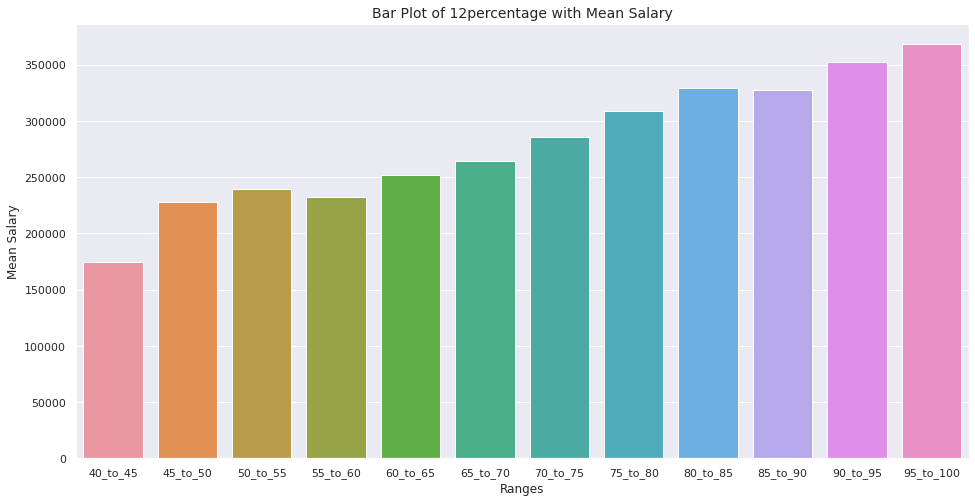

In [18]:
figure(figsize=(16,8))
plot = barplot(x=salary_range_frame["Ranges"], y=salary_range_frame["Mean Salary"])
plot.set_title("Bar Plot of 12percentage with Mean Salary", fontsize=14)

Text(0.5, 1.0, 'Bar Plot of 12percentage with Median Salary')

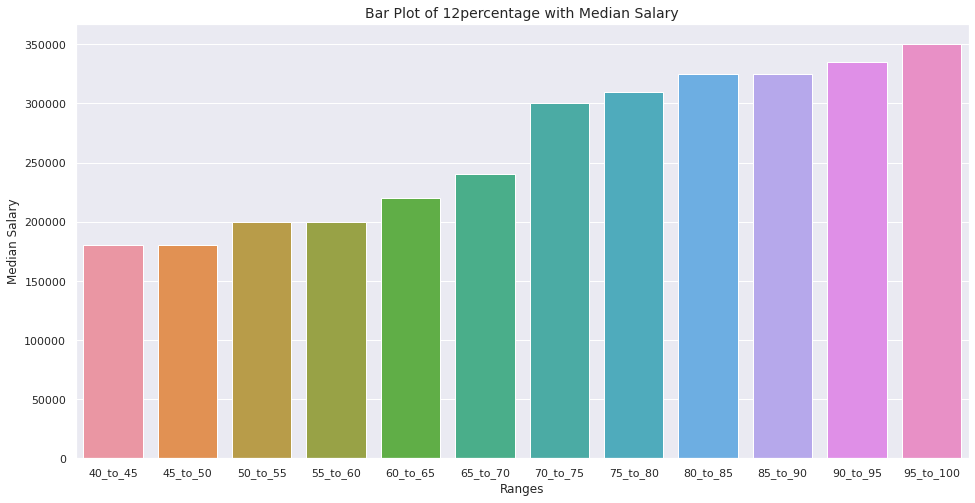

In [19]:
figure(figsize=(16,8))
plot = barplot(x=salary_range_frame["Ranges"], y=salary_range_frame["Median Salary"])
plot.set_title("Bar Plot of 12percentage with Median Salary", fontsize=14)

Text(0.5, 1.0, 'Line Plot of Ranges with Mean Salary')

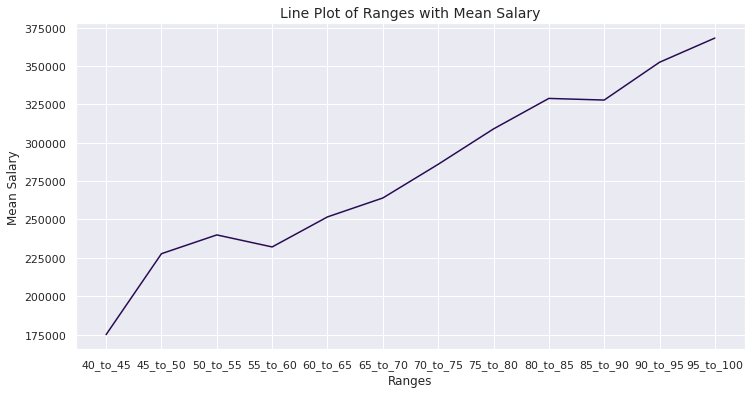

In [20]:
figure(figsize=(12,6))
plot= lineplot(x=salary_range_frame["Ranges"], y=salary_range_frame["Mean Salary"])
plot.set_title("Line Plot of Ranges with Mean Salary", fontsize=14)

Text(0.5, 1.0, 'Line Plot of Ranges with Median Salary')

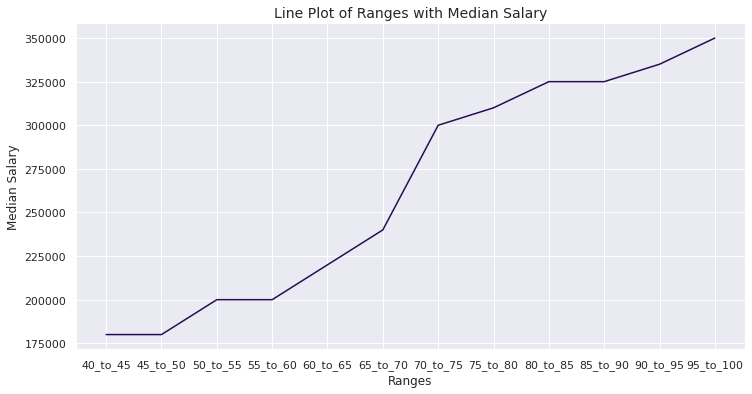

In [21]:
figure(figsize=(12,6))
plot= lineplot(x=salary_range_frame["Ranges"], y=salary_range_frame["Median Salary"])
plot.set_title("Line Plot of Ranges with Median Salary", fontsize=14)

# From above data and analysis we can deduce

### Trend of Salary with 12percentage is somewhat linear with positive slope

#### From the above plots we can say more the percentage in 12 better is the probabilty of getting higher package